Found 5511 images belonging to 2 classes.
Found 22047 images belonging to 2 classes.


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 96s 543ms/step - accuracy: 0.9266 - loss: 0.1981
689/689 ━━━━━━━━━━━━━━━━━━━━ 524s 761ms/step - accuracy: 0.9230 - loss: 0.2043
Validation Accuracy: 0.9426601529121399
173/173 ━━━━━━━━━━━━━━━━━━━━ 93s 528ms/step
Training Accuracy: 0.9405815005302429
689/689 ━━━━━━━━━━━━━━━━━━━━ 367s 532ms/step
Accuracy of Training: 0.9405814850092983
ROC AUC Score of validation dir: 0.9840012485545478
ROC AUC Score of training dir: 0.9841210181719264


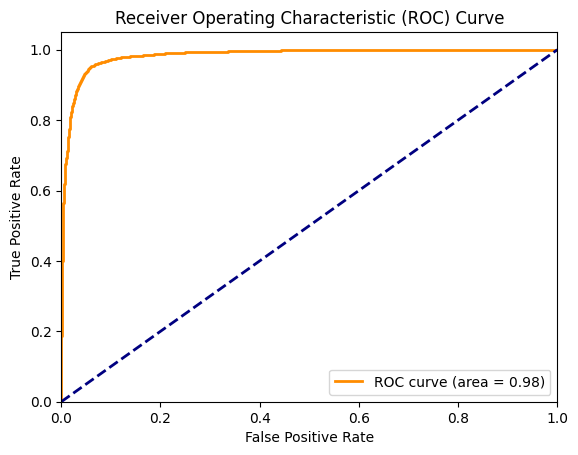

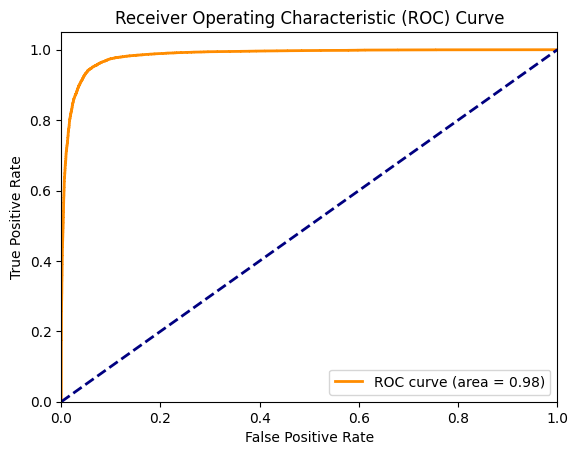

Confusion Matrix of validation:
[[2545  211]
 [ 105 2650]]
Confusion Matrix of training:
[[10100   923]
 [  387 10637]]


In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model(r'D:\rohan\malaria_detection_project 18-04-2024 chinmay lap\malaria_detection_project\malaria_detection\malaria_parasite_detection_model_1.h5')

# Load validation dataset
validation_data_dir = r'D:\rohan\malaria_detection_project 18-04-2024 chinmay lap\malaria_detection_project\malaria_detection\path_to_validation_directory'
train_data_dir = r'D:\rohan\malaria_detection_project 18-04-2024 chinmay lap\malaria_detection_project\malaria_detection\path_to_train_directory'

# Set image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Preprocess and augment validation data
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)  

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)  

# Evaluate the model on the validation dataset
eval_result_val = model.evaluate(validation_generator)
eval_result_train = model.evaluate(train_generator)

# Print the accuracy
accuracy = eval_result_val[1]
print(f'Validation Accuracy: {accuracy}')

predictions_y = model.predict(validation_generator)
y_true_y = validation_generator.classes
y_pred_y = np.argmax(predictions_y, axis=1)

accuracy = eval_result_train[1]
print(f'Training Accuracy: {accuracy}')
predictions_t = model.predict(train_generator)
y_true_t = train_generator.classes
y_pred_t = np.argmax(predictions_t, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_t, y_pred_t)
print(f'Accuracy of Training: {accuracy}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_true_y, predictions_y[:, 1])  # Assuming second column represents positive class
print(f'ROC AUC Score of validation dir: {roc_auc}')

roc_auc = roc_auc_score(y_true_t, predictions_t[:, 1])  # Assuming second column represents positive class
print(f'ROC AUC Score of training dir: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true_y, predictions_y[:, 1])  # Assuming second column represents positive class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, _ = roc_curve(y_true_t, predictions_t[:, 1])  # Assuming second column represents positive class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_y, y_pred_y)
print('Confusion Matrix of validation:')
print(conf_matrix)

conf_matrix = confusion_matrix(y_true_t, y_pred_t)
print('Confusion Matrix of training:')
print(conf_matrix)
